# BAX423 Homework 5: Deep Learning

## The Analyst Amigos: Vaaridhi Mathur, Rahul Rajput, Xingyi (Stella) Wang, Jinying (Jinny) Zhong

In [ ]:
# Run below commands
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.0.3/spark-3.0.3-bin-hadoop3.2.tgz
!tar xf spark-3.0.3-bin-hadoop3.2.tgz
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.3-bin-hadoop3.2"

In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
from pyspark import SparkConf, SparkContext
from datetime import datetime, date, timedelta
from dateutil import relativedelta
from pyspark.sql import SQLContext, Row
from pyspark.sql.types import *
from pyspark.sql.functions import *
from pyspark.sql import DataFrame
from pyspark.sql.functions import *
from pyspark.sql.functions import to_timestamp, to_date
from pyspark.sql import functions as F  
from pyspark.sql.functions import collect_list, collect_set, concat, first, array_distinct, col, size, expr
from pyspark.sql import DataFrame 
import random

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Problem 1: Softmax Properties

## 1. Show that the softmax function is invariant to constant offsets to its input, i.e., sof tmax(a + c1) = sof tmax(a), where c ∈ R is some constant and ​1 ​denotes a column vector of 1s. [7pts]

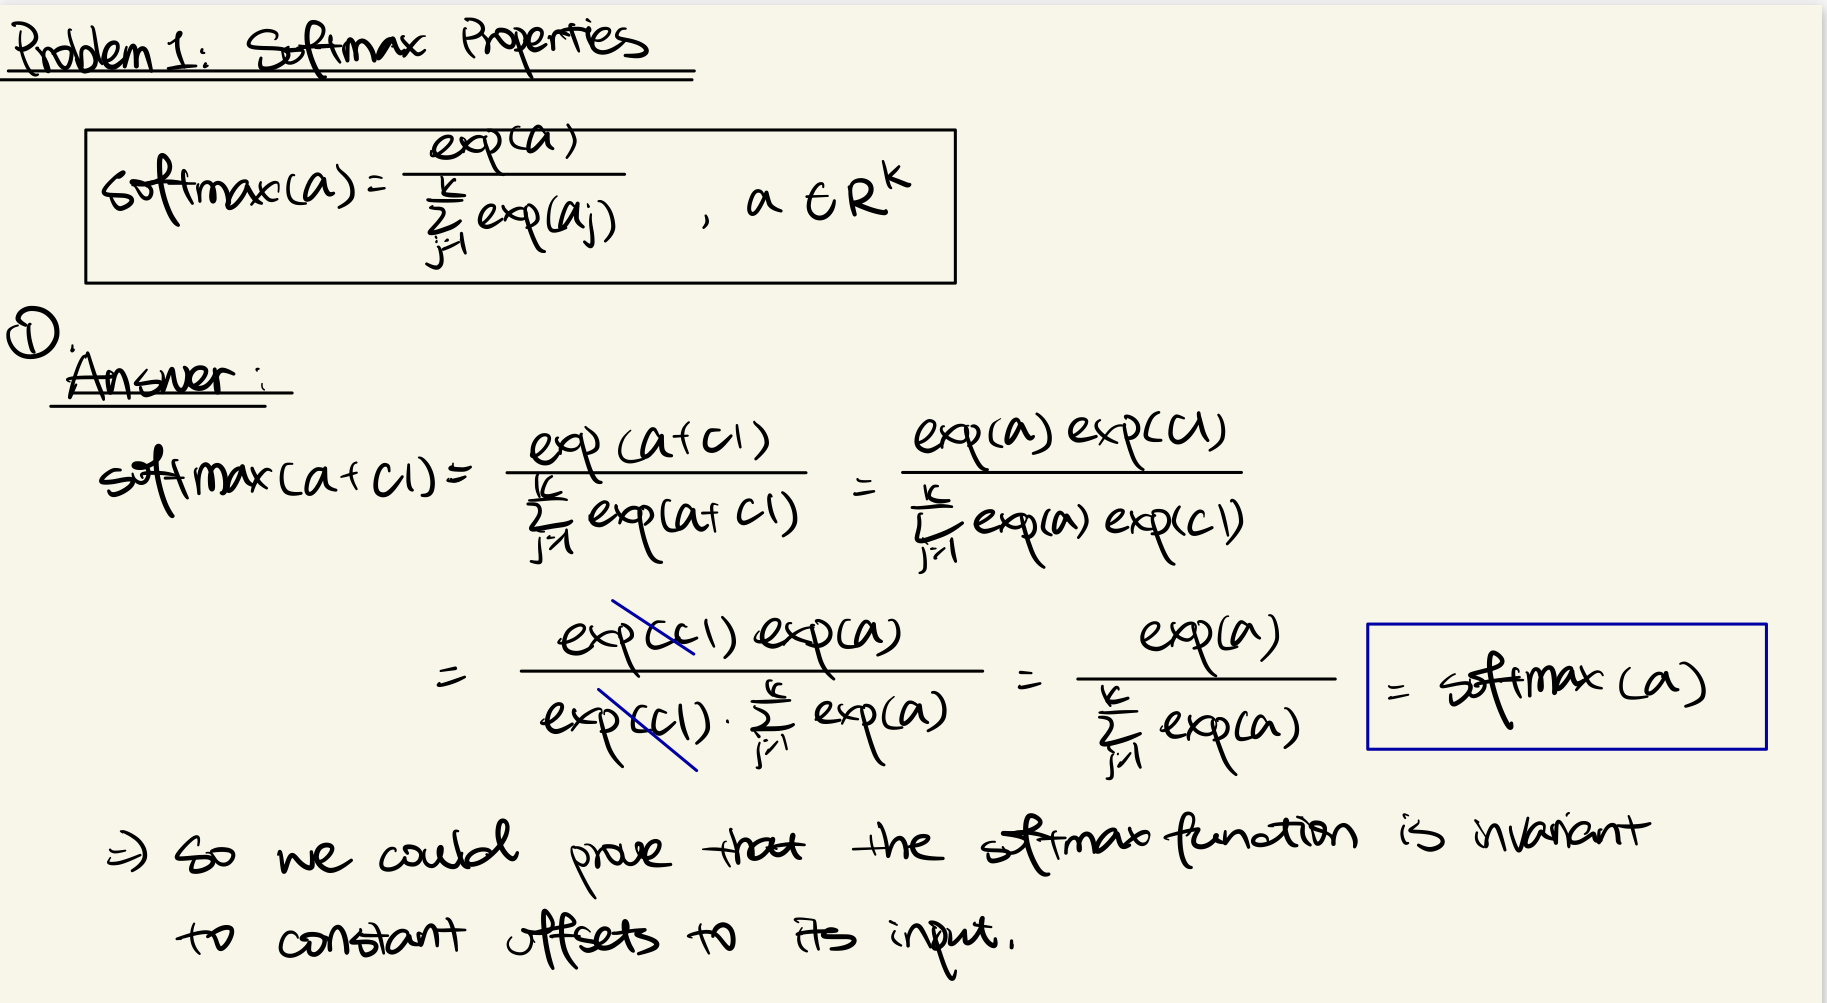

## 2. In practice, why is the observation that the softmax function is invariant to constant offsets to its input important when implementing it in a neural network? [3pts]


**Answer:**

When implementing softmax function in a neural network, we might run into numerical instability problems. Specifically, the exponential function used in softmax can blow up for large input values, which could lead to NaN (Not a Number) values. This is because computers have a finite precision, and when numbers get too large or too small, they can't be represented accurately.

To prevent this from happening, a common practice is to subtract the maximum element in the input vector from all elements in the vector before feeding it into the softmax function. This technique ensures that the largest value fed into the exponential function is 0, thereby preventing large outputs. This doesn't change the results due to the invariant property, but it does improve numerical stability.

This is crucial in practical applications of neural networks, where numerical instability could cause the training process to fail.





# Problem 2: Training a CNN using CIFAR-10 Data

## 1. Warm-up: Load the dataset and check how the images look like [3pts]

In [ ]:
import tarfile
import os

data_path = '/content/drive/Shareddrives/Big Data Project/Homework/Deep Learning Project/cifar-10-python.tar.gz' 
with tarfile.open(data_path) as tar:
    tar.extractall(path='./')

In [ ]:
import tensorflow as tf

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0


170498071/170498071 [==============================] - 6s 0us/step


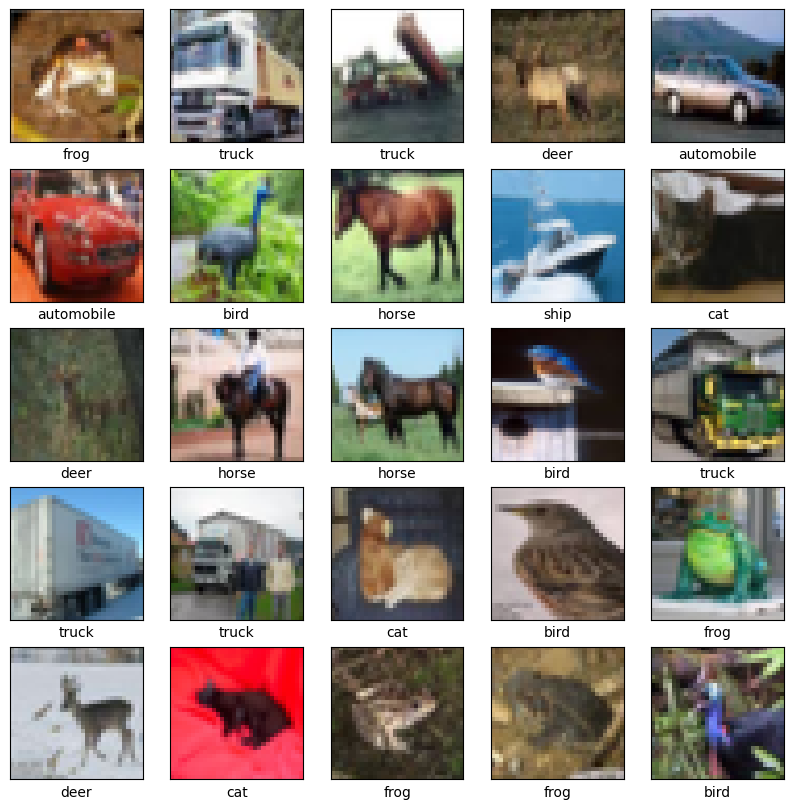

In [ ]:
import matplotlib.pyplot as plt

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()


## 2. Train a CNN with three hidden convolutional layers that use the ReLU activation function. Use 64 11×11 filters for the first layer, followed by 2×2 max pooling (stride of 2). The next two convolutional layers will use 128 3×3 filters followed by the ReLU activation function. Prior to the softmax layer, you should have an average pooling layer that pools across the preceding feature map. Do not use a pre-trained CNN. Train your model using all of the CIFAR-10 training data, and evaluate your trained system on the CIFAR-10 test data. Display the training loss as a function of epochs. What is the accuracy on the test data? How did you initialize the weights? Discuss your architecture and hyper-parameters. [20pts]

**Answer:**

In this question, we choose **the standard Keras initializers** for the weights, which is 'Glorot uniform' or 'Xavier uniform' initializer. It aims to maintain the variance of the activations and backpropagated gradients roughly constant across layers. This initialization helps to ensure that the signal from the input data is neither too small nor too large, which can cause the weights and the network to fail to learn from the data effectively.

We use **the Adam optimizer** for training, and initialize it with a learning rate of 0.001. The model will be trained for 20 epochs (takes about 1 hour). The loss function is sparse categorical crossentropy, which is suitable for multi-class classification problems where the labels are integers.

The hyperparameters are:
- Learning rate: 0.001 (commonly used value for Adam optimizer)
- Number of epochs: 10 (this might need to be increased if the model has not fully converged)

Test accuracy: 0.6225000023841858

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential()

# use 64 11×11 filters for the first layer, followed by 2×2 max pooling (stride of 2).
model.add(layers.Conv2D(64, (11, 11), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2), strides=2))

# the next two convolutional layers will use 128 3×3 filters followed by the ReLU activation function. 
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))

# applies global average pooling to the output of the preceding convolutional layer
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(10, activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 22, 22, 64)        23296     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 128)         73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 128)         147584    
                                                                 
 global_average_pooling2d (G  (None, 128)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 10)                1

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 287s 183ms/step - loss: 1.6185 - accuracy: 0.4072 - val_loss: 1.5940 - val_accuracy: 0.4179
Epoch 2/10
1563/1563 [==============================] - 270s 173ms/step - loss: 1.4778 - accuracy: 0.4633 - val_loss: 1.4831 - val_accuracy: 0.4613
Epoch 3/10
1563/1563 [==============================] - 271s 174ms/step - loss: 1.3782 - accuracy: 0.5026 - val_loss: 1.3966 - val_accuracy: 0.4997
Epoch 4/10
1563/1563 [==============================] - 263s 169ms/step - loss: 1.3015 - accuracy: 0.5335 - val_loss: 1.2787 - val_accuracy: 0.5419
Epoch 5/10
1563/1563 [==============================] - 262s 168ms/step - loss: 1.2338 - accuracy: 0.5609 - val_loss: 1.2227 - val_accuracy: 0.5622
Epoch 6/10
1563/1563 [==============================] - 267s 171ms/step - loss: 1.1811 - accuracy: 0.5804 - val_loss: 1.1886 - val_accuracy: 0.5848
Epoch 7/10
1563/1563 [==============================] - 271s 173ms/step - loss: 1.1267 - accuracy: 0.6013 - val_

 ### Display the training loss as a function of epochs.

The loss decreased as the number of epochs increased, going from above 1.6 to below 1.0.

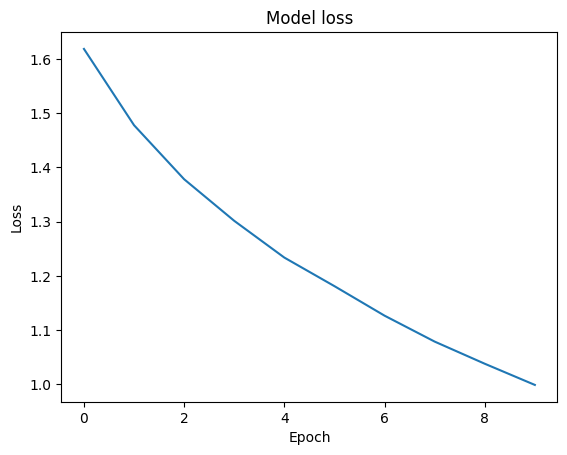

In [ ]:
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

### Test accuracy:

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 13s - loss: 1.0822 - accuracy: 0.6225 - 13s/epoch - 42ms/step

Test accuracy: 0.6225000023841858


## 3. Visualize all of the 11×11×3 filters learned by the first convolutional layer as an RGB image array (I suggest making a large RGB image that is made up of each of the smaller images, so it will have 4 rows and 16 columns). Note that you will need to normalize each filter by contrast stretching to do this visualization, i.e., for each filter subtract the smallest value and then divide by the new largest value. [7pts]


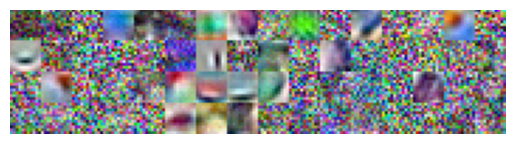

In [ ]:
import numpy as np

# Get the weights of the first convolutional layer
conv1_weights = model.layers[0].get_weights()[0]

# Normalize each filter by contrast stretching
normalized_filters = []
for i in range(conv1_weights.shape[3]):
    filter_weights = conv1_weights[:, :, :, i]
    min_val = np.min(filter_weights)
    max_val = np.max(filter_weights)
    normalized_filter = (filter_weights - min_val) / (max_val - min_val)
    normalized_filters.append(normalized_filter)

# Create a large RGB image with 4 rows and 16 columns
rows = 4
cols = 16
large_image = np.zeros((rows * 11, cols * 11, 3), dtype=np.float32)

# Fill in the large image with normalized filters
for i in range(rows):
    for j in range(cols):
        filter_index = i * cols + j
        if filter_index < len(normalized_filters):
            large_image[i * 11: (i + 1) * 11, j * 11: (j + 1) * 11, :] = normalized_filters[filter_index]

# Display the large image
plt.imshow(large_image)
plt.axis('off')
plt.show()

## 4. Using the same architecture, add in batch normalization between each of the hidden layers. Compare the training loss with and without batch normalization as a function of epochs. What is the final test error? Visualize the filters. [20pts]

Based on the calculated loss with and without batch normalization and the line graphs below, we observed that the loss is larger when using batch normalization compared to when it is not used. Additionally, the gap between the two lines appears to increase as the number of epochs progresses, although both lines show a decreasing trend over the epochs.

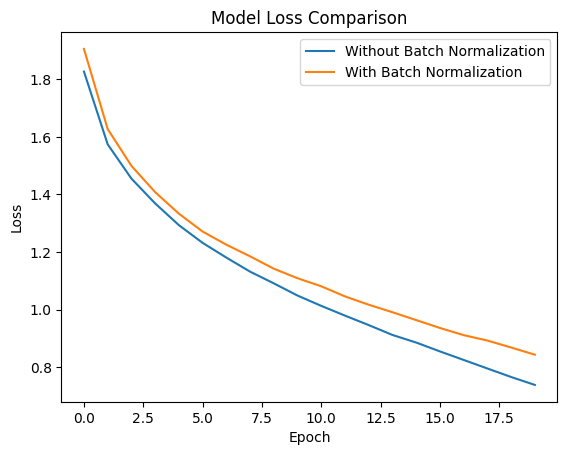

313/313 - 15s - loss: 1.0788 - accuracy: 0.6356 - 15s/epoch - 47ms/step
Final test error (with batch normalization): 0.3644000291824341


In [ ]:
# Compile the model without batch normalization
model_no_bn = tf.keras.models.clone_model(model)
model_no_bn.compile(optimizer='adam',
                    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                    metrics=['accuracy'])

# Train the model without batch normalization
history_no_bn = model_no_bn.fit(train_images, train_labels, epochs=20,
                                validation_data=(test_images, test_labels),
                                verbose=0)

# Compile the model with batch normalization
model_bn = tf.keras.models.clone_model(model)
model_bn.compile(optimizer='adam',
                 loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 metrics=['accuracy'])

# Train the model with batch normalization
history_bn = model_bn.fit(train_images, train_labels, epochs=20,
                          validation_data=(test_images, test_labels),
                          verbose=0)

# Plot the training loss for both cases
plt.plot(history_no_bn.history['loss'], label='Without Batch Normalization')
plt.plot(history_bn.history['loss'], label='With Batch Normalization')
plt.title('Model Loss Comparison')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Compute the final test error
test_loss_bn, test_acc_bn = model_bn.evaluate(test_images, test_labels, verbose=2)
print('Final test error (with batch normalization):', 1 - test_acc_bn)

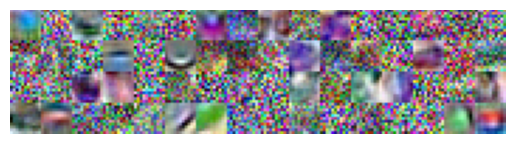

In [ ]:
# Visualize the filters
conv1_weights = model_bn.layers[0].get_weights()[0]
normalized_filters = []
for i in range(conv1_weights.shape[3]):
    filter_weights = conv1_weights[:, :, :, i]
    min_val = np.min(filter_weights)
    max_val = np.max(filter_weights)
    normalized_filter = (filter_weights - min_val) / (max_val - min_val)
    normalized_filters.append(normalized_filter)

rows = 4
cols = 16
large_image = np.zeros((rows * 11, cols * 11, 3), dtype=np.float32)
for i in range(rows):
    for j in range(cols):
        filter_index = i * cols + j
        if filter_index < len(normalized_filters):
            large_image[i * 11: (i + 1) * 11, j * 11: (j + 1) * 11, :] = normalized_filters[filter_index]

plt.imshow(large_image)
plt.axis('off')
plt.show()

# Problem 3

For this problem, you will train a Generative Adversarial Network (GAN) on
Fashion-MNIST dataset. Fashion-MNIST is a dataset of Zalando's article images
consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each
example is a 28x28 grayscale image, associated with a label from 10 classes. You can
find it here: https://www.tensorflow.org/datasets/catalog/fashion_mnist. Your GAN will
try to generate images that look like those in the Fashion-MNIST dataset

## Part 1 - Vanilla GAN

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tqdm.autonotebook import tqdm
%matplotlib inline
from IPython import display
import pandas as pd

<ipython-input-2-396e4441eb54>:4: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [ ]:
print(tf.__version__)

2.12.0


In [ ]:
TRAIN_BUF=60000
BATCH_SIZE=512
TEST_BUF=10000
DIMS = (28,28,1)
N_TRAIN_BATCHES =int(TRAIN_BUF/BATCH_SIZE)
N_TEST_BATCHES = int(TEST_BUF/BATCH_SIZE)

In [ ]:
# load dataset
(train_images, train_label), (test_images, test_label) = tf.keras.datasets.fashion_mnist.load_data()

# split dataset
train_images = ((train_images.reshape(train_images.shape[0], 28, 28, 1).astype(
    "float32"
) / 255.0) - 0.5) * 2
test_images = ((test_images.reshape(test_images.shape[0], 28, 28, 1).astype("float32") / 255.0) - 0.5) * 2

# batch datasets
train_dataset = (
    tf.data.Dataset.from_tensor_slices(train_images)
    .shuffle(TRAIN_BUF)
    .batch(BATCH_SIZE)
)
test_dataset = (
    tf.data.Dataset.from_tensor_slices(test_images)
    .shuffle(TEST_BUF)
    .batch(BATCH_SIZE)
)

In [ ]:
class GAN(tf.keras.Model):
    """ a basic GAN class 
    Extends:
        tf.keras.Model
    """

    def __init__(self, **kwargs):
        super(GAN, self).__init__()
        self.__dict__.update(kwargs)

        self.gen = tf.keras.Sequential(self.gen)
        self.disc = tf.keras.Sequential(self.disc)

    def generate(self, z):
        return self.gen(z)

    def discriminate(self, x):
        return self.disc(x)

    def compute_loss(self, x):
        """ passes through the network and computes loss
        """
        # generating noise from a uniform distribution
        z_samp = tf.random.normal([x.shape[0], 1, 1, self.n_Z])

        # run noise through generator
        x_gen = self.generate(z_samp)
        # discriminate x and x_gen
        logits_x = self.discriminate(x)
        logits_x_gen = self.discriminate(x_gen)
        ### losses
        # losses of real with label "1"
        disc_real_loss = gan_loss(logits=logits_x, is_real=True)
        # losses of fake with label "0"
        disc_fake_loss = gan_loss(logits=logits_x_gen, is_real=False)
        disc_loss = disc_fake_loss + disc_real_loss

        # losses of fake with label "1"
        gen_loss = gan_loss(logits=logits_x_gen, is_real=True)

        return disc_loss, gen_loss

    def compute_gradients(self, x):
        """ passes through the network and computes loss
        """
        ### pass through network
        with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
            disc_loss, gen_loss = self.compute_loss(x)

        # compute gradients
        gen_gradients = gen_tape.gradient(gen_loss, self.gen.trainable_variables)
        disc_gradients = disc_tape.gradient(disc_loss, self.disc.trainable_variables)

        return gen_gradients, disc_gradients

    def apply_gradients(self, gen_gradients, disc_gradients):

        self.gen_optimizer.apply_gradients(
            zip(gen_gradients, self.gen.trainable_variables)
        )
        self.disc_optimizer.apply_gradients(
            zip(disc_gradients, self.disc.trainable_variables)
        )
    @tf.function
    def train(self, train_x):
        gen_gradients, disc_gradients = self.compute_gradients(train_x)
        self.apply_gradients(gen_gradients, disc_gradients)
        
cross_entropy = tf.keras.losses.BinaryCrossentropy(reduction=tf.keras.losses.Reduction.SUM_OVER_BATCH_SIZE)

def gan_loss(logits, is_real=True):
    """Computes standard gan loss between logits and labels
    """
    if is_real:
        labels = tf.ones_like(logits)
    else:
        labels = tf.zeros_like(logits)

    return cross_entropy(labels, logits)

In [ ]:
N_Z = 64
generator = [
    tf.keras.layers.Dense(units=7 * 7 * 128, activation="relu"),
    tf.keras.layers.Reshape(target_shape=(7, 7, 128)),
    tf.keras.layers.Conv2DTranspose(
        filters=128, kernel_size=3, strides=(2, 2), padding="SAME", activation="relu"
    ),
    tf.keras.layers.Conv2DTranspose(
        filters=64, kernel_size=3, strides=(2, 2), padding="SAME", activation="relu"
    ),
    tf.keras.layers.Conv2DTranspose(
        filters=32, kernel_size=3, strides=(1, 1), padding="SAME", activation="relu"
    ),
    tf.keras.layers.Conv2DTranspose(
        filters=1, kernel_size=3, strides=(1, 1), padding="SAME", activation="tanh"
    ),
]

discriminator = [
    tf.keras.layers.InputLayer(input_shape=DIMS),
    tf.keras.layers.Conv2D(
        filters=32, kernel_size=3, strides=(2, 2), activation="relu"
    ),
    tf.keras.layers.Conv2D(
        filters=64, kernel_size=3, strides=(2, 2), activation="relu"
    ),
    tf.keras.layers.Conv2D(
        filters=128, kernel_size=3, strides=(2, 2), activation="relu"
    ),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=1, activation="sigmoid"),
]


In [ ]:
# optimizers
gen_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.7, beta_2=0.999)
disc_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)       
# model
model = GAN(
    gen = generator,
    disc = discriminator,
    gen_optimizer = gen_optimizer,
    disc_optimizer = disc_optimizer,
    n_Z = N_Z
)

Training The Model

In [ ]:
# exampled data for plotting results
def plot_reconstruction(model, nex=8, zm=2):
    samples = model.generate(tf.random.normal(shape=(BATCH_SIZE, N_Z)))
    samples = (samples + 1) / 2.0  # Rescale the output from [-1,1] to [0,1]
    fig, axs = plt.subplots(ncols=nex, nrows=1, figsize=(zm * nex, zm))
    for axi in range(nex):
        axs[axi].matshow(
                    samples.numpy()[axi].squeeze(), cmap=plt.cm.Greys_r, vmin=0, vmax=1
                )
        axs[axi].axis('off')
    plt.show()
    return samples


In [ ]:
# a pandas dataframe to save the loss information to
losses = pd.DataFrame(columns = ['disc_loss', 'gen_loss'])

Epoch: 49 | disc_loss: 1.3826490640640259 | gen_loss: 0.7034780383110046


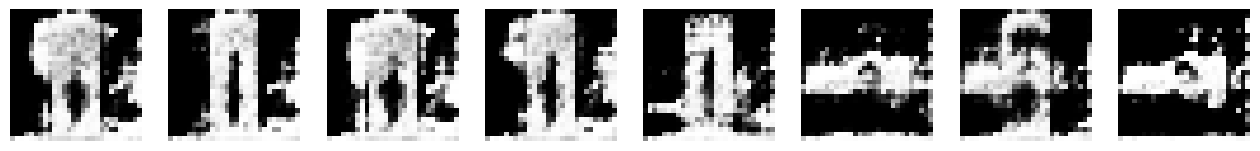

In [ ]:
n_epochs = 50
dict_samples = {}

for epoch in range(n_epochs):
    # train
    for batch, train_x in tqdm(
        zip(range(N_TRAIN_BATCHES), train_dataset), total=N_TRAIN_BATCHES
    ):
        model.train(train_x)
    # test on holdout
    loss = []
    for batch, test_x in tqdm(
        zip(range(N_TEST_BATCHES), test_dataset), total=N_TEST_BATCHES
    ):
        loss.append(model.compute_loss(train_x))
    losses.loc[len(losses)] = np.mean(loss, axis=0)
    # plot results
    display.clear_output()
    print(
        "Epoch: {} | disc_loss: {} | gen_loss: {}".format(
            epoch, losses.disc_loss.values[-1], losses.gen_loss.values[-1]
        )
    )
    dict_samples[epoch] = plot_reconstruction(model)

In [ ]:
# model.gen.save('generator.h5')
# model.disc.save('discriminator.h5')

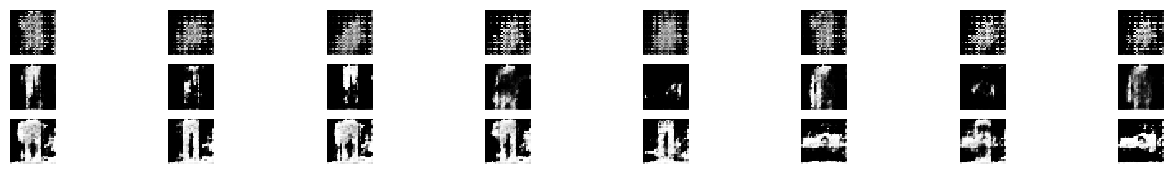

In [ ]:
# Print reconstructions at 2nd, 25th, and 50th epochs
nex = 8
zm = 2
fig, axs = plt.subplots(ncols=nex, nrows=3, figsize=(zm * nex, zm))
for row, epoch in enumerate([1,25,49]):
  for axi in range(nex):
      axs[row][axi].matshow(
                  dict_samples[epoch].numpy()[axi].squeeze(), cmap=plt.cm.Greys_r, vmin=0, vmax=1
              )
      axs[row][axi].axis('off')
plt.show()


In [ ]:
print(losses['gen_loss'])

0     0.823360
1     0.622729
2     0.357831
3     0.752669
4     0.718757
5     0.715055
6     0.721746
7     0.694632
8     0.707545
9     0.660488
10    0.683180
11    0.689731
12    0.715325
13    0.684788
14    0.688709
15    0.703816
16    0.686264
17    0.690061
18    0.718934
19    0.663521
20    0.705320
21    0.690879
22    0.693238
23    0.689674
24    0.688613
25    0.702833
26    0.712573
27    0.691858
28    0.708023
29    0.691743
30    0.694364
31    0.690306
32    0.683579
33    0.722836
34    0.696661
35    0.698434
36    0.696808
37    0.691633
38    0.692585
39    0.747582
40    0.699247
41    0.694966
42    0.711423
43    0.670745
44    0.708203
45    0.736543
46    0.690464
47    0.707728
48    0.692331
49    0.703478
Name: gen_loss, dtype: float32


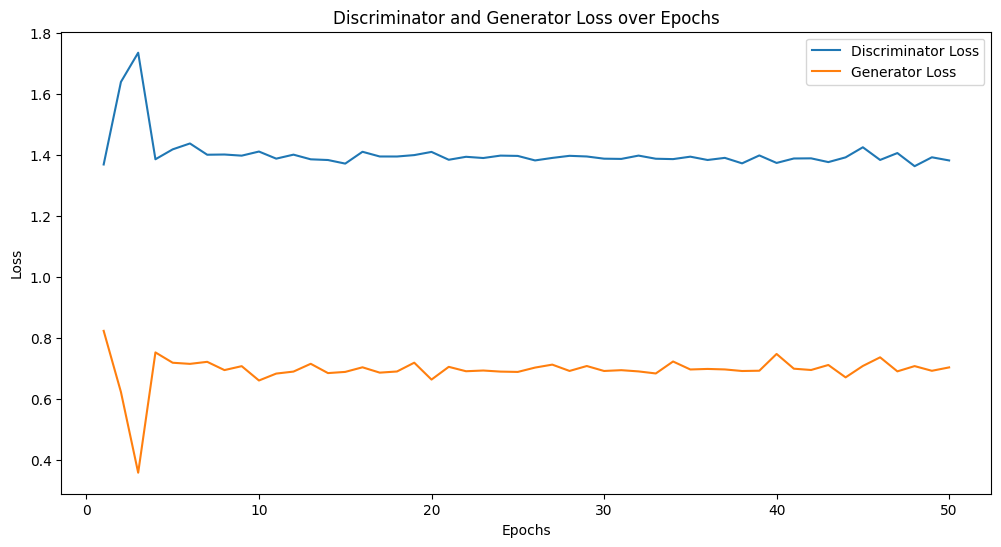

In [ ]:
epochs = range(1, len(losses)+1)

plt.figure(figsize=(12, 6))

# Plot discriminator loss
plt.plot(epochs, losses['disc_loss'], label='Discriminator Loss')

# Plot generator loss
plt.plot(epochs, losses['gen_loss'], label='Generator Loss')

plt.title('Discriminator and Generator Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Part 2 - Mode Collapse in GANs



## Creating Classifier

In [ ]:
classifier = [
    tf.keras.layers.InputLayer(input_shape=DIMS),
    tf.keras.layers.Conv2D(
        filters=32, kernel_size=3, strides=(2, 2), activation="relu"
    ),
    tf.keras.layers.Conv2D(
        filters=64, kernel_size=3, strides=(2, 2), activation="relu"
    ),
    tf.keras.layers.Conv2D(
        filters=128, kernel_size=3, strides=(2, 2), activation="relu"
    ),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=10, activation="softmax"),
]

In [ ]:
classifier= tf.keras.Sequential(classifier)

In [ ]:
classifier.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

In [ ]:
# Fine-tune the classifier
classifier.fit(train_images, train_label, batch_size=32, epochs=50, validation_data=(test_images, test_label))

Epoch 1/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4825 - accuracy: 0.8237 - val_loss: 0.3924 - val_accuracy: 0.8558
Epoch 2/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3284 - accuracy: 0.8790 - val_loss: 0.3304 - val_accuracy: 0.8795
Epoch 3/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2784 - accuracy: 0.8988 - val_loss: 0.3106 - val_accuracy: 0.8866
Epoch 4/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2438 - accuracy: 0.9097 - val_loss: 0.3015 - val_accuracy: 0.8903
Epoch 5/50
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2157 - accuracy: 0.9207 - val_loss: 0.3041 - val_accuracy: 0.8909
Epoch 6/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1908 - accuracy: 0.9302 - val_loss: 0.2921 - val_accuracy: 0.8986
Epoch 7/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1672 - accuracy: 0.9393 - val_loss: 0.3017 - val_accuracy:

In [ ]:
#classifier.save('classifier.h5')

In [ ]:
# Creating images for 3000 samples
samples = model.generate(tf.random.normal(shape=(3000, N_Z)))

In [ ]:
# Predict class labels
_ = classifier.predict(samples)
predicted_labels=np.argmax(_,axis=1)

94/94 [==============================] - 0s 2ms/step


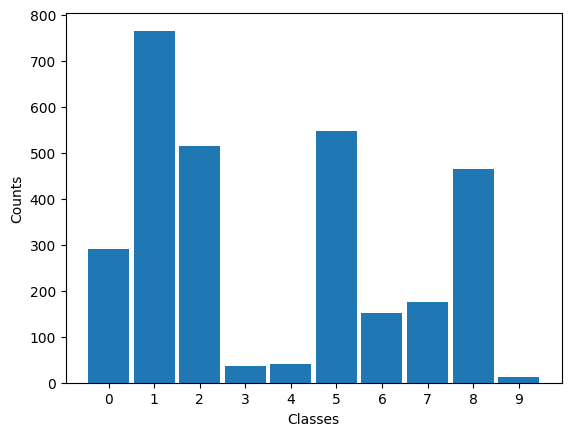

In [ ]:
# Plot the histogram of predicted labels
plt.hist(predicted_labels, bins=np.arange(11)-0.5, rwidth=0.9)
plt.xlabel('Classes')
plt.ylabel('Counts')
plt.xticks(np.arange(10))
plt.show()


## Unrolled GAN

In [ ]:
class UnrolledGAN(GAN):
    def __init__(self, unrolling_steps=5, **kwargs):
        super(UnrolledGAN, self).__init__(**kwargs)
        self.unrolling_steps = unrolling_steps

    @tf.function
    def compute_loss_and_gradients(self, x):
        with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
            z_samp = tf.random.normal([x.shape[0], 1, 1, self.n_Z])
            x_gen = self.generate(z_samp)
            logits_x = self.discriminate(x)
            logits_x_gen = self.discriminate(x_gen)

            # Compute the discriminator loss
            disc_real_loss = gan_loss(logits=logits_x, is_real=True)
            disc_fake_loss = gan_loss(logits=logits_x_gen, is_real=False)
            disc_loss = disc_fake_loss + disc_real_loss

        disc_gradients = disc_tape.gradient(disc_loss, self.disc.trainable_variables)

        # Save the discriminator weights
        temp_disc_weights = [w.value() for w in self.disc.trainable_variables]

        # Unroll the discriminator
        for _ in range(self.unrolling_steps):
            self.disc_optimizer.apply_gradients(zip(disc_gradients, self.disc.trainable_variables))
            with tf.GradientTape() as disc_tape:
                z_samp = tf.random.normal([x.shape[0], 1, 1, self.n_Z])
                x_gen = self.generate(z_samp)
                logits_x_gen = self.discriminate(x_gen)
                disc_fake_loss = gan_loss(logits=logits_x_gen, is_real=False)
            disc_gradients = disc_tape.gradient(disc_fake_loss, self.disc.trainable_variables)

        # Compute the generator loss
        with tf.GradientTape() as gen_tape:
            z_samp = tf.random.normal([x.shape[0], 1, 1, self.n_Z])
            x_gen = self.generate(z_samp)
            logits_x_gen = self.discriminate(x_gen)
            gen_loss = gan_loss(logits=logits_x_gen, is_real=True)

        gen_gradients = gen_tape.gradient(gen_loss, self.gen.trainable_variables)

        # Restore the discriminator weights
        for w, v in zip(self.disc.trainable_variables, temp_disc_weights):
            w.assign(v)

        return disc_loss, gen_loss, gen_gradients, disc_gradients

    @tf.function
    def train(self, train_x):
        disc_loss, gen_loss, gen_gradients, disc_gradients = self.compute_loss_and_gradients(train_x)
        self.apply_gradients(gen_gradients, disc_gradients)


In [ ]:
discriminator = [
    tf.keras.layers.InputLayer(input_shape=DIMS),
    tf.keras.layers.Conv2D(
        filters=32, kernel_size=3, strides=(2, 2), activation="relu"
    ),
    tf.keras.layers.Conv2D(
        filters=64, kernel_size=3, strides=(2, 2), activation="relu"
    ),
    tf.keras.layers.Conv2D(
        filters=128, kernel_size=3, strides=(2, 2), activation="relu"
    ),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=1, activation="sigmoid"),
]

generator = [
    tf.keras.layers.Dense(units=7 * 7 * 128, activation="relu"),
    tf.keras.layers.Reshape(target_shape=(7, 7, 128)),
    tf.keras.layers.Conv2DTranspose(
        filters=128, kernel_size=3, strides=(2, 2), padding="SAME", activation="relu"
    ),
    tf.keras.layers.Conv2DTranspose(
        filters=64, kernel_size=3, strides=(2, 2), padding="SAME", activation="relu"
    ),
    tf.keras.layers.Conv2DTranspose(
        filters=32, kernel_size=3, strides=(1, 1), padding="SAME", activation="relu"
    ),
    tf.keras.layers.Conv2DTranspose(
        filters=1, kernel_size=3, strides=(1, 1), padding="SAME", activation="tanh"
    ),
]

gen_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5, beta_2=0.999)
disc_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

In [ ]:
unrolled_gan = UnrolledGAN(
    gen=generator,
    disc=discriminator,
    gen_optimizer=gen_optimizer,
    disc_optimizer=disc_optimizer,
    n_Z=N_Z,
    unrolling_steps=5
)

In [ ]:
# exampled data for plotting results
def plot_reconstruction(model, nex=8, zm=2):
    samples = model.generate(tf.random.normal(shape=(BATCH_SIZE, N_Z)))
    samples = (samples + 1) / 2.0  # Rescale the output from [-1,1] to [0,1]
    fig, axs = plt.subplots(ncols=nex, nrows=1, figsize=(zm * nex, zm))
    for axi in range(nex):
        axs[axi].matshow(
                    samples.numpy()[axi].squeeze(), cmap=plt.cm.Greys_r, vmin=0, vmax=1
                )
        axs[axi].axis('off')
    plt.show()
    return samples


In [ ]:
# a pandas dataframe to save the loss information to
losses = pd.DataFrame(columns = ['disc_loss', 'gen_loss'])

Epoch: 49 | disc_loss: 2.3560893535614014 | gen_loss: 2.185330867767334


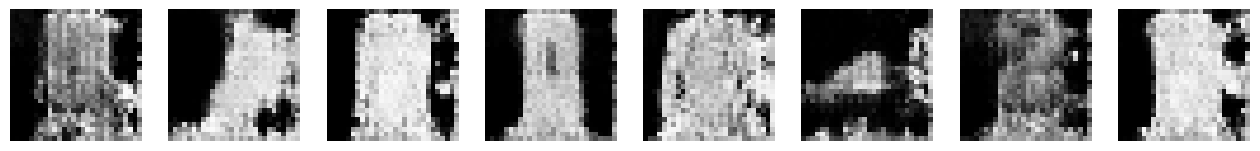

In [ ]:
n_epochs = 50
dict_samples = {}

for epoch in range(n_epochs):
    # train
    for batch, train_x in tqdm(
        zip(range(N_TRAIN_BATCHES), train_dataset), total=N_TRAIN_BATCHES
    ):
        unrolled_gan.train(train_x)
    # test on holdout
    loss = []
    for batch, test_x in tqdm(
        zip(range(N_TEST_BATCHES), test_dataset), total=N_TEST_BATCHES
    ):
        loss.append(unrolled_gan.compute_loss(train_x))
    losses.loc[len(losses)] = np.mean(loss, axis=0)
    # plot results
    display.clear_output()
    print(
        "Epoch: {} | disc_loss: {} | gen_loss: {}".format(
            epoch, losses.disc_loss.values[-1], losses.gen_loss.values[-1]
        )
    )
    dict_samples[epoch] = plot_reconstruction(unrolled_gan)

In [ ]:
# Creating images for 3000 samples
samples = unrolled_gan.generate(tf.random.normal(shape=(3000, N_Z)))

In [ ]:
# Predict class labels
_ = classifier.predict(samples)
predicted_labels=np.argmax(_,axis=1)

94/94 [==============================] - 0s 2ms/step


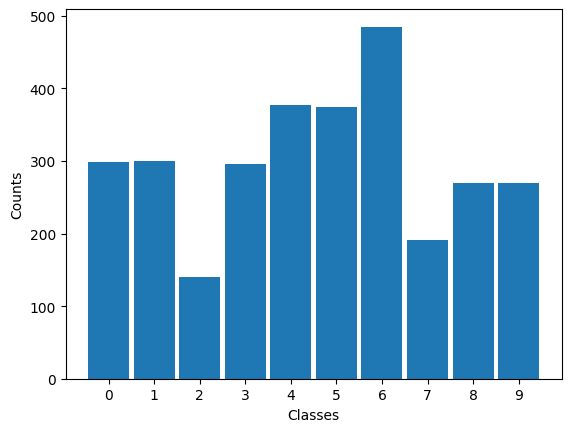

In [ ]:
# Plot the histogram of predicted labels
plt.hist(predicted_labels, bins=np.arange(11)-0.5, rwidth=0.9)
plt.xlabel('Classes')
plt.ylabel('Counts')
plt.xticks(np.arange(10))
plt.show()
